# Multinomial Logistic Regression Exercise

In this notebook, we will extend our `SGDClassifier` to train a multinomial dataset.

You will see that there is little difference between in generating a binomial logistic regression model from a multinomial logistic regression model in `scikit`.


## Instructions for All Labs
* Read each cell and implement the TODOs sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Some markdown cells contain questions.
  * For questions <span style="color:red;">colored in red</span>, you must submit your answers in the corresponding Assignment in the course page. Make sure that you enter your responses in the item with the matching question code. Answers that do not follow the prescribed format will automatically be marked wrong by the checker.
  * For questions <span style="color:green;">colored in green</span>, you don't have to submit your answers, but you must think about these questions as they will help enrich your understanding of the concepts covered in the labs.
* You are expected to search how to some functions work on the Internet or via the docs. 
* You may add new cells for "scrap work".
* The notebooks will undergo a "Restart and Run All" command, so make sure that your code is working properly.
* You may not reproduce this notebook or share them to anyone.

## Import
Import **matplotlib**, **csv**, and **numpy**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import csv

plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

# Synthetic Dataset

Let's use the `make_blobs()` function to create a dataset with 1650 instances centered in (-5, 0), (0, 0), and (-1, -4).

In [2]:
from sklearn.datasets import make_blobs

centers = [[-5, 0], [0, 0], [-1, -4]]

X, y = make_blobs(n_samples=1650, 
                  centers=centers, 
                  random_state=5)

Let's get the number of instances per class. Below are our classes and their corresponding colors in the graph later.
- class `0`, violet
- class `1`, turquoise
- class `2`, yellow

In [3]:
X_0 = X[y == 0]
X_1 = X[y == 1]
X_2 = X[y == 2]

print('Number of class 0:', len(X_0))
print('Number of class 1:', len(X_1))
print('Number of class 2:', len(X_2))

Number of class 0: 550
Number of class 1: 550
Number of class 2: 550


There are 550 instances for each class.

Let's divide the dataset into train and test set. The test set will contain 50 instances for each class.

In [4]:
np.random.seed(1)

# Select 50 `class 0` instances
selected_0 = np.random.choice(np.arange(len(X_0)),
                              size=50,
                              replace=False)

# Select 50 `class 1` instances
selected_1 = np.random.choice(np.arange(len(X_1)),
                              size=50,
                              replace=False)

# Select 50 `class 2` instances
selected_2 = np.random.choice(np.arange(len(X_2)),
                              size=50,
                              replace=False)

# Form the test set
X_test = np.concatenate((X_0[selected_0],
                         X_1[selected_1],
                         X_2[selected_2]))
y_test = np.concatenate((np.array([0 for _ in range(50)]),
                         np.array([1 for _ in range(50)]),
                         np.array([2 for _ in range(50)])))

print(X_test.shape)
print(y_test.shape)

(150, 2)
(150,)


The remaining 1500 instances will be a part of the train set, where each class has 500 instances.

In [5]:
X_train = np.concatenate((np.delete(X_0, selected_0, 0),
                          np.delete(X_1, selected_1, 0),
                          np.delete(X_2, selected_2, 0)))
y_train = np.concatenate((np.array([0 for _ in range(500)]),
                          np.array([1 for _ in range(500)]),
                          np.array([2 for _ in range(500)])))

print(X_train.shape)
print(y_train.shape)

(1500, 2)
(1500,)


Visualize the train data.

Text(0.5, 1.0, 'Train data')

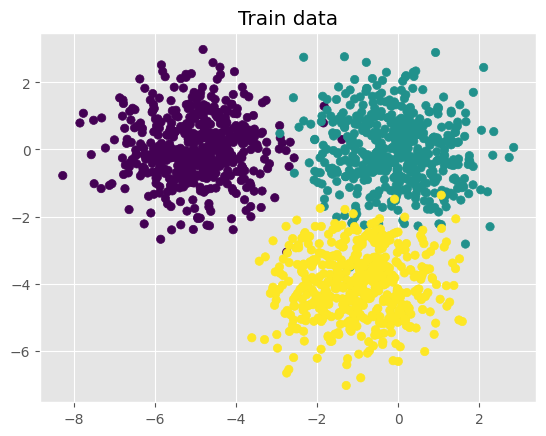

In [6]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title('Train data')

Visualize the test data.

Text(0.5, 1.0, 'Test data')

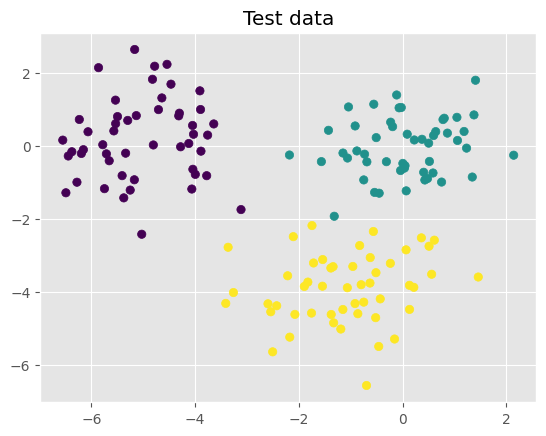

In [7]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('Test data')

**Sanity check:** You should have a similar graph like our training data, but now with fewer points. The colors should appear in the same area, too.

This is the data which we will feed into our multinomial logistic regression model.

## Multinomial Logistic Regression

Use `sklearn`'s `SGDClassifier` to create a logistic regression model. Since we have three classes (`Class 0`, `Class 1`, and `Class 2`), we will be implementing a multinomial logistic regression.

Import the `SGDClassifier` class.

In [8]:
from sklearn.linear_model import SGDClassifier

Instantiate an `SGDClassifier` object. Set the following hyperparameters:
- Loss function: 'log_loss'
- Initial learning rate: 0.0001
- Learning rate: 'constant'
- Random state: 1
- Verbose: 0

See the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html).

In [9]:
# Write your code here
model = SGDClassifier (loss = 'log_loss' , eta0 = 0.0001, learning_rate = 'constant' , random_state = 1 , verbose = 0)

Set the maximum number of epochs to 200.

In [10]:
max_epochs = 200

## Using the `DataLoader` class to train via mini-batch gradient descent

We will train the model using mini-batch gradient descent. 

Use the `data_loader.py` file that we implemented in the previous notebook. Import the `DataLoader` class.

In [11]:
from data_loader import DataLoader

Instantiate an `DataLoader` object. Pass the `X` and `y` of the train set and `20` as our `batch_size`.

In [12]:
# Write your code here
data_loader = DataLoader (X, y, 20)

Train your model. Complete the code below.

In [13]:
from sklearn.metrics import log_loss

e = 0
is_converged = False
previous_loss = 0
labels = np.unique(y_train)

# For each epoch
while e < max_epochs and is_converged is not True:
    
    loss = 0
    
    # TODO: Get the batch for this epoch.
    X_batch, y_batch = data_loader.get_batch()
    
    # For each batch
    for X, y in zip(X_batch, y_batch):
        
        # TODO: Partial fit the model to the subset you selected
        # In partial fit, you have to pass a classes parameters, use labels as the value
        model.partial_fit(X , y, classes = labels)
        
        # Compute the loss
        y_pred = model.predict_proba(X_train)
        loss += log_loss(y_train, y_pred)
        
    # Display the average loss per epoch
    print('Epoch:', e + 1, '\tLoss:', (loss / len(X_batch)))
    
    if abs(previous_loss - loss) < 0.05:
        is_converged = True
    else:
        previous_loss = loss
        e += 1

Epoch: 1 	Loss: 1.0012122776855918
Epoch: 2 	Loss: 0.8572979881177916
Epoch: 3 	Loss: 0.7628804422778661
Epoch: 4 	Loss: 0.6995622858805179
Epoch: 5 	Loss: 0.6546161723225242
Epoch: 6 	Loss: 0.6195130095616708
Epoch: 7 	Loss: 0.5930597216234308
Epoch: 8 	Loss: 0.5711905262101945
Epoch: 9 	Loss: 0.5529126852808698
Epoch: 10 	Loss: 0.5374757839735838
Epoch: 11 	Loss: 0.5240336427670698
Epoch: 12 	Loss: 0.5122598062265264
Epoch: 13 	Loss: 0.5015651505442413
Epoch: 14 	Loss: 0.492157425920396
Epoch: 15 	Loss: 0.4834459939726334
Epoch: 16 	Loss: 0.4754441466261238
Epoch: 17 	Loss: 0.46799356264282166
Epoch: 18 	Loss: 0.46108743261334256
Epoch: 19 	Loss: 0.45475080790738964
Epoch: 20 	Loss: 0.4486280307880024
Epoch: 21 	Loss: 0.44286583722066525
Epoch: 22 	Loss: 0.4374094677101848
Epoch: 23 	Loss: 0.4321544023952365
Epoch: 24 	Loss: 0.4271618563571154
Epoch: 25 	Loss: 0.4224549625813899
Epoch: 26 	Loss: 0.41783207563735125
Epoch: 27 	Loss: 0.4134485332850536
Epoch: 28 	Loss: 0.40931802103464

<span style="color:red;">**Question 4-15:** How many epochs did the model train before convergence?</span>

**Answer: 153**

<span style="color:red;">**Question 4-16:** What is the average loss at the last epoch? Limit to 4 decimal places.</span>

**Answer: 0.2247**

## Try our trained model on the test data

Now, let's get the prediction results on the test data to see if our model can handle unseen instances. Store the predicted labels in the variable `predictions`.

In [14]:
# Write your code here
predictions = model.predict (X_test)

Print the predictions.

In [15]:
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Compare the ground truth labels with the predicted labels. Store the total number of correct predictions in the variable `num_correct`.

In [16]:
# Write your code here
num_correct = np.sum (y_test == predictions)

Print the number of correct predictions.

In [17]:
print(num_correct)

148


Compute for the accuracy. Store the accuracy in the variable `accuracy`.

In [18]:
# Write your code here
accuracy = num_correct / y_test.size

Print the accuracy.

In [19]:
print(accuracy)

0.9866666666666667


<span style="color:red;">**Question 4-17:** What is the accuracy of the model when evaluated on the test set? Express your answer in a floating point number from 0 to 1. Limit to 4 decimal places.</span>

**Answer: 0.9867**

Print out the probabilities of each instance in the test set belonging to all of the 3 classes.

In [20]:
# Write your code here

probabilities = model.predict_proba(X_test)
print('Sum of the probabilities of each instance: \n', np.sum(probabilities, axis=1))
print('Probabilities:\n', probabilities)

Sum of the probabilities of each instance: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Probabilities:
 [[9.14595577e-01 2.97054307e-02 5.56989921e-02]
 [9.72287770e-01 2.38274461e-02 3.88478427e-03]
 [8.56099669e-01 1.33118232e-01 1.07820992e-02]
 [9.84170218e-01 3.92217586e-03 1.19076066e-02]
 [8.89831938e-01 9.37676839e-02 1.64003785e-02]
 [9.78487388e-01 6.69499525e-03 1.48176165e-02]
 [9.76068379e-01 1.88959500e-02 5.03567093e-03]
 [8.70543307e-01 1.69749574e-02 1.12481735e-01]
 [9.57035853e-01 5.08360553e-03 3.78805414e-02]
 [9.85487165e-01 2.74368003e-03 1.17691545e-02]
 

**Sanity check:** The sum probability of each instance should all be equal to one (you should see a vector of length 100 all containing 1s). The probabilities should be a (100, 3) matrix. Each row signifies a test instance and the columns represent the probability of a class.

In [21]:
print(model.coef_)

[[-1.12280385  0.74734595]
 [ 1.13337509  1.03552418]
 [ 0.4263164  -1.39760075]]


Previously, in the binomial logistic regression, your weights will have a shape of `(1, num_features)`, where `num_features` is the number of features in the dataset.

In this multinomial logistic regression problem, your weights/coefficients have a `(3, num_features)` shape, where `num_features` in this particular example is 2. You can confirm this by checking the shape of the weights.

<span style="color:red;">**Question 4-18:** What does it mean to have a 3 rows of weights in multinomial logistic regression? Why is it different from the binomial logistic regression weight shape?</span>

**Answer: 3 Rows of weights in multinomial regression represents the 3 classes present. It is different from the weight shape of a binomial logistic regression because instead of just using 1 set of weights to determine true or false, multinomial needs to make a prediction for all classes available.**

## Visualizing our model prediction boundaries

To see the prediction boundary, we will predict each possible point on our feature space.

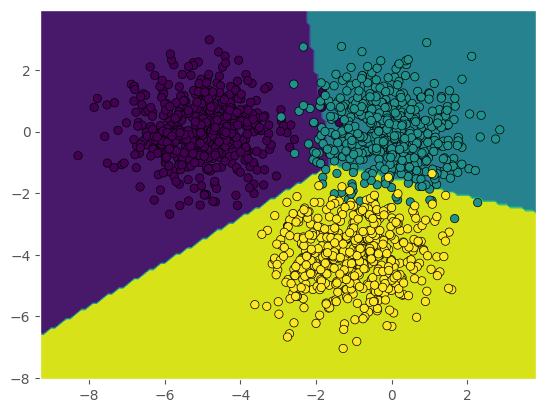

In [22]:
x_min, x_max = X_train[:,0].min() - 1, X_train[:,0].max() + 1
y_min, y_max = X_train[:,1].min() - 1, X_train[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


x_test = np.squeeze(np.stack((xx.ravel(),yy.ravel()))).T
Z = model.predict(x_test)

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='black')

<span style="color:green;">**Question:** Some of the instances of other classes are found in the regions of other classes. For example, some cyan dots are found in the violet and yellow regions. Does this indicate that our model is not trained correctly? Explain your answer.</span>

**Answer: No it does not. It is almost impossible make a perfect division line especially when data points of different classes mix with each other. The positions of the cyan dots in the different regions just shows that despite being cyan, their positions gives them a bigger probability to be part of the other group.**

# Iris Dataset
We will use the Iris dataset as our dataset. Each instance represents an Iris flower using 4 distinct features:
- `sepal_length` - length of the sepal in centimeters
- `sepal_width` - width of the sepal in centimeters
- `petal_length` - length of the petal in centimeters
- `petal_width` - width of the petal in centimeters

Iris flowers can be 3 divided into different classes, which are:
- `Iris-setosa` - class `0`
- `Iris-versicolor` - class `1`
- `Iris-virginica` - class `2`

Let's load `Iris.csv`.

In [23]:
classes = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

with open('Iris.csv', 'r') as csv_file:
    raw_data = csv.reader(csv_file)
    X_iris = np.empty((0, 4), float)
    y_iris = np.empty((0, 1), int)
    for row in raw_data:
        X_iris = np.vstack([X_iris, np.array([float(row[0]),     # column for sepal_length
                                              float(row[1]),     # column for sepal_width
                                              float(row[2]),     # column for petal_length
                                              float(row[3])])])  # column for petal_width
        
        y_iris = np.append(y_iris, np.array([classes[row[4]]]))  # column for class

# This transforms the vector of length N into a matrix with shape (N, 1)
y_house = np.expand_dims(y_iris, 1) 

print('Training data shape:', X_iris.shape)
print('Ground truth values shape:', y_iris.shape)

Training data shape: (150, 4)
Ground truth values shape: (150,)


<span style="color:red;">**Question 4-19:** How many instances do we have?</span>

**Answer: 150**

Let's get the number of instances per class.

In [24]:
X_iris_0 = X_iris[y_iris == 0]
X_iris_1 = X_iris[y_iris == 1]
X_iris_2 = X_iris[y_iris == 2]

print('Number of class 0:', len(X_iris_0))
print('Number of class 1:', len(X_iris_1))
print('Number of class 2:', len(X_iris_2))

Number of class 0: 50
Number of class 1: 50
Number of class 2: 50


There are 50 instances for each class.

Let's divide the dataset into train and test set. The test set will contain 10 instances for each class.

In [25]:
np.random.seed(1)

# Select 10 `class 0` instances
selected_0 = np.random.choice(np.arange(len(X_iris_0)),
                              size=10,
                              replace=False)

# Select 10 `class 1` instances
selected_1 = np.random.choice(np.arange(len(X_iris_1)),
                              size=10,
                              replace=False)

# Select 10 `class 2` instances
selected_2 = np.random.choice(np.arange(len(X_iris_2)),
                              size=10,
                              replace=False)

# Form the test set
X_test = np.concatenate((X_iris_0[selected_0],
                         X_iris_1[selected_1],
                         X_iris_2[selected_2]))
y_test = np.concatenate((np.array([0 for _ in range(10)]),
                         np.array([1 for _ in range(10)]),
                         np.array([2 for _ in range(10)])))

print(X_test.shape)
print(y_test.shape)

(30, 4)
(30,)


The remaining 120 instances will be a part of the train set, where each class has 40 instances.

In [26]:
X_train = np.concatenate((np.delete(X_iris_0, selected_0, 0),
                          np.delete(X_iris_1, selected_1, 0),
                          np.delete(X_iris_2, selected_2, 0)))
y_train = np.concatenate((np.array([0 for _ in range(40)]),
                          np.array([1 for _ in range(40)]),
                          np.array([2 for _ in range(40)])))

print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


## Multinomial Logistic Regression

Use `sklearn`'s `SGDClassifier` to create a logistic regression model. Since we have three classes (`Iris-setosa`, `Iris-versicolor`, and `Iris-virginica`), we will be implementing a multinomial logistic regression.

Instantiate an `SGDClassifier` object. Set the following hyperparameters:
- Loss function: 'log_loss'
- Initial learning rate: 0.01
- Learning rate: 'constant'
- Random state: 1
- Verbose: 0

See the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html).

In [27]:
# Write your code here
model = SGDClassifier (loss = 'log_loss' , eta0 = 0.01, learning_rate = 'constant' , random_state = 1 , verbose = 0)

Set the maximum number of epochs to 200.

In [28]:
max_epochs = 200

## Using the `DataLoader` class to train via mini-batch gradient descent

We will train the model using mini-batch gradient descent. 

Instantiate a `DataLoader` object. Pass the `X` and `y` of the train set and `5` as our `batch_size`.

In [29]:
# Write your code here
data_loader = DataLoader (X_train, y_train, 5) 

Train your model. Complete the code below.

In [30]:
e = 0
is_converged = False
previous_loss = 0
labels = np.unique(y_iris)

# For each epoch
while e < max_epochs and is_converged is not True:
    
    loss = 0
    
    # TODO: Get the batch for this epoch.
    X_batch, y_batch = data_loader.get_batch()
    
    # For each batch
    for X, y in zip(X_batch, y_batch):
        
        # TODO: Partial fit the model to the subset you selected
        # In partial fit, you have to pass a classes parameters, use labels as the value
        model.partial_fit (X, y, classes = labels)
        
        
        # Compute the loss
        y_pred = model.predict_proba(X_train)
        loss += log_loss(y_train, y_pred)
        
    # Display the average loss per epoch
    print('Epoch:', e + 1, '\tLoss:', (loss / len(X_batch)))
    
    if abs(previous_loss - loss) < 0.05:
        is_converged = True
    else:
        previous_loss = loss
        e += 1

Epoch: 1 	Loss: 0.956217616719746
Epoch: 2 	Loss: 0.7477494218620869
Epoch: 3 	Loss: 0.6306031926871668
Epoch: 4 	Loss: 0.591452917096083
Epoch: 5 	Loss: 0.5682605745071627
Epoch: 6 	Loss: 0.5367706850475297
Epoch: 7 	Loss: 0.5251713735173845
Epoch: 8 	Loss: 0.4885123605400181
Epoch: 9 	Loss: 0.5035212902472149
Epoch: 10 	Loss: 0.4775725637020422
Epoch: 11 	Loss: 0.4646974239506985
Epoch: 12 	Loss: 0.4525303053036942
Epoch: 13 	Loss: 0.4397073810602754
Epoch: 14 	Loss: 0.4326518461562366
Epoch: 15 	Loss: 0.4327124081312455


<span style="color:red;">**Question 4-20:** How many epochs did the model train before convergence?</span>

**Answer: 15**

<span style="color:red;">**Question 4-21:** What is the average loss at the last epoch? Limit to 4 decimal places.</span>

**Answer: 0.4314**

## Try our trained model on the test data

Now, let's get the prediction results on the test data to see if our model can handle unseen instances. Store the predicted labels in the variable `predictions`.

In [31]:
# Write your code here
predictions = model.predict(X_test)

Print the predictions.

In [32]:
print(predictions)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 1 1 1 1 2]


Compare the ground truth labels with the predicted labels. Store the total number of correct predictions in the variable `num_correct`.

In [33]:
# Write your code here
num_correct = sum(predictions == y_test)

Print the number of correct predictions.

In [34]:
print(num_correct)

25


Compute for the accuracy. Store the accuracy in the variable `accuracy`.

In [35]:
# Write your code here
accuracy = num_correct / y_test.size

Print the accuracy

In [36]:
print(accuracy)

0.8333333333333334


<span style="color:red;">**Question 4-22:** What is the accuracy of the model when evaluated on the test set? Express your answer in a floating point number from 0 to 1. Limit to 4 decimal places.</span>

**Answer: 0.7667**

## Test your model with your own input feature

In [ ]:

classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

print('Enter the sepal_length:')
f1 = float(input())

print('Enter the sepal_width:')
f2 = float(input())

print('Enter the petal_length:')
f3 = float(input())

print('Enter the petal_width:')
f4 = float(input())

pred = np.squeeze(model.predict([[f1, f2, f3, f4]]))

print('The class is', classes[pred])

# Conclusion

Congratulations, you made it this far! We've been able to generate data, classify them using our logistic regression model, and see how it performs.

Go ahead and try placing the centers nearer each other to see if our model can still handle more complex data, just remember to place them back before submission.

Now, we have a machine learning algorithm that can classify an instance into multiple classes. We also have the probability of an instance belonging to each of the class. This allows us to put a threshold on the probability (e.g. if the highest probability on an instance is 35%, we can say 'we are not sure' instead of giving a prediction; but if the highest probability is 90%, we can confidently claim our prediction)

It is important that you know and understand logistic regression because these will be the building blocks of our next topic: neural networks. 

### <center>fin</center>

<!-- DO NOT MODIFY OR DELETE THIS -->
<sup>made/compiled by daniel stanley tan & courtney anne ngo 🐰 & thomas james tiam-lee</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> danieltan07@gmail.com & courtneyngo@gmail.com & thomasjamestiamlee@gmail.com</sup><br>
<sup>please cc your instructor, too</sup>
<!-- DO NOT MODIFY OR DELETE THIS -->